In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Users\Partha.bora\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
train = pd.read_csv("https://raw.githubusercontent.com/pamuba/PythonDE/main/titanic_train.csv");


In [14]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [15]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

<AxesSubplot:>

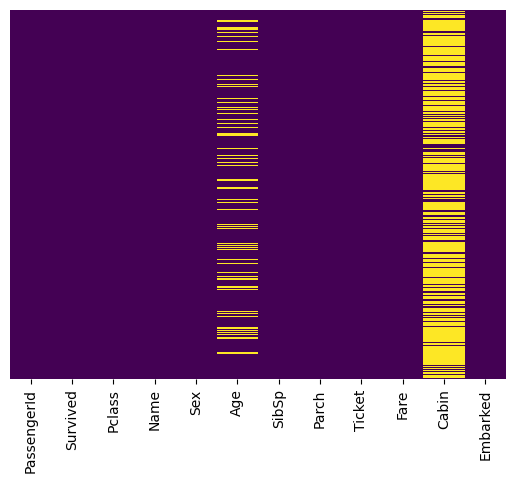

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

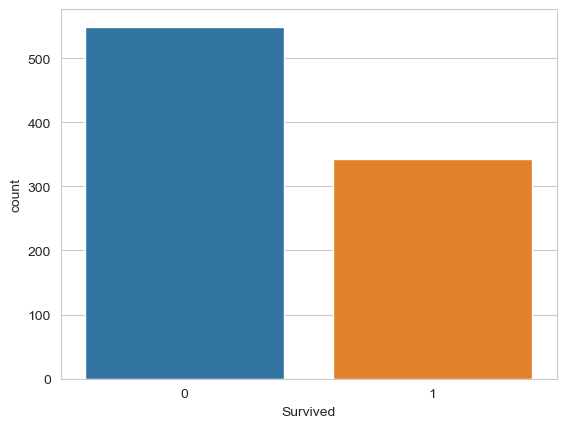

In [29]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

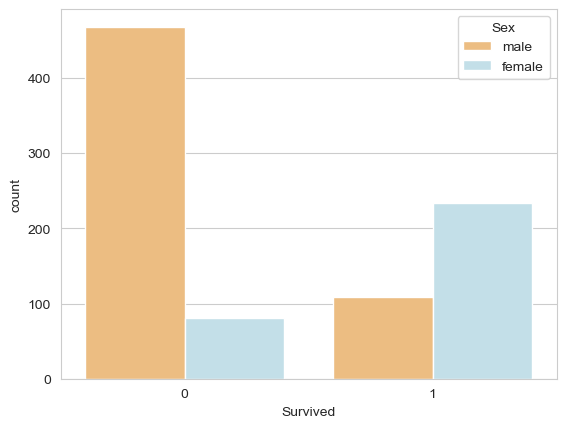

In [30]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Sex",data=train, palette="RdYlBu")

<AxesSubplot:xlabel='Survived', ylabel='count'>

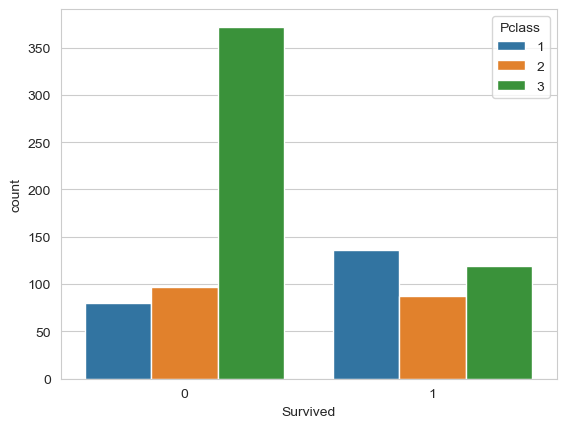

In [28]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Pclass",data=train)

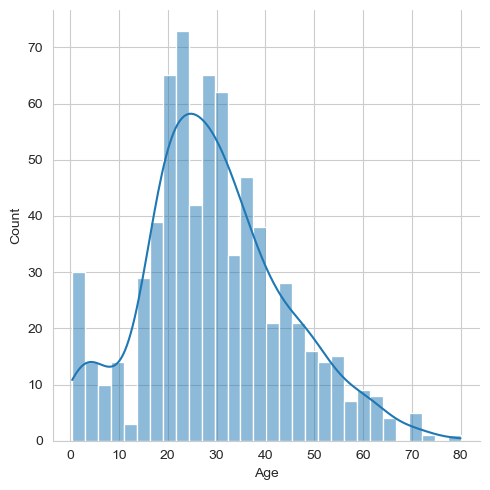

In [32]:
sns.displot(train["Age"].dropna(), kde=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

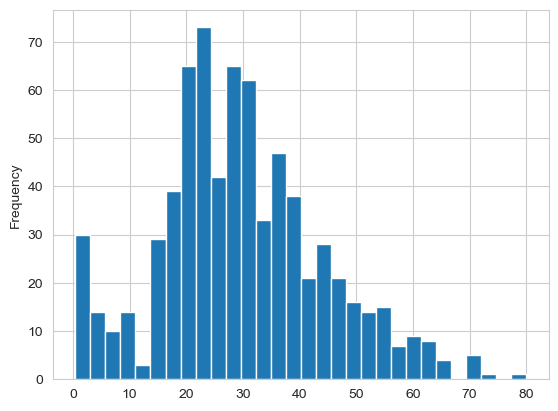

In [34]:
train["Age"].plot.hist(bins=30)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

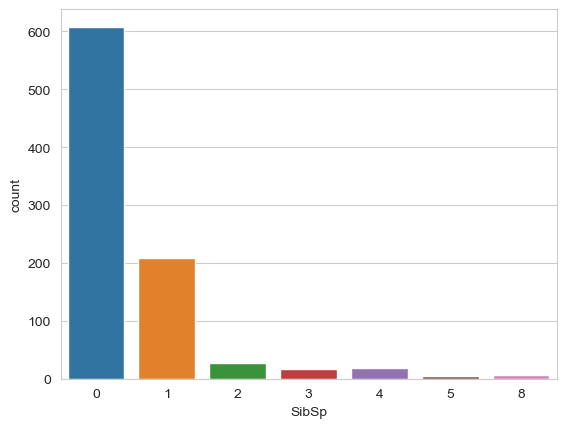

In [38]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

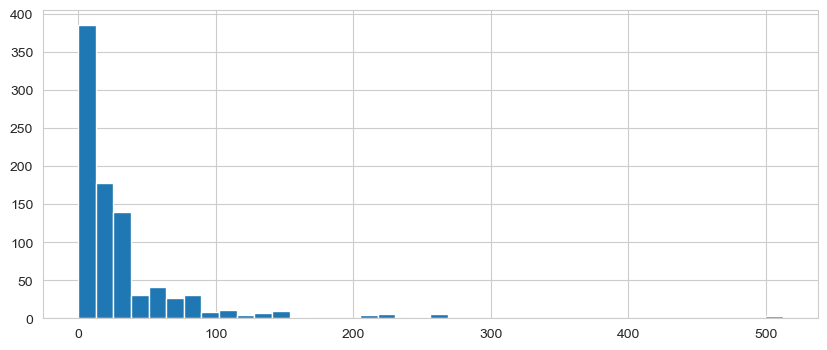

In [40]:
train["Fare"].hist(bins=40, figsize=(10,4))

In [43]:
import cufflinks as cf

In [44]:
cf.go_offline()

In [46]:
train["Fare"].iplot(kind='hist',bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

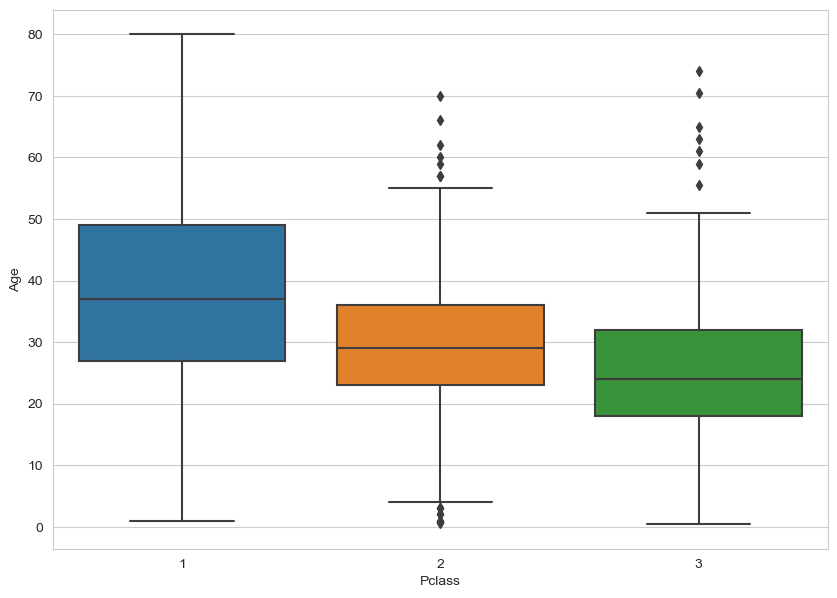

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y='Age', data=train)

In [49]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age
        
        

In [51]:
train["Age"] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

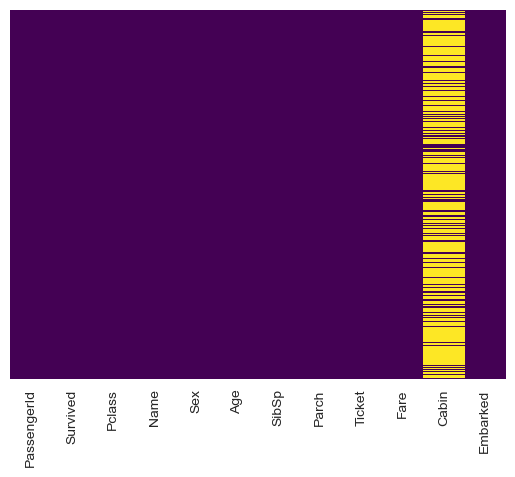

In [52]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [53]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

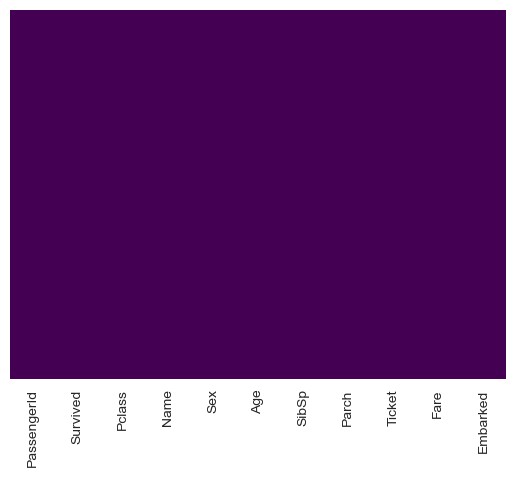

In [54]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [55]:
train.dropna(inplace=True)

In [58]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [61]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [62]:
train = pd.concat([train, sex, embark], axis=1)

In [63]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  24.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  male  Q  S  
0        0         A/5 21171   7.2500        S     1  0  1  
1        0          PC 17599  71.2833        C     0  0  0  
2        0  STON/O2. 3101282   7.9250        S     0  0  1  
3        0            113803  53.1000        S     0  0  1  
4        0            373450   8.0500        S     1  0  1  
..     ...               ...      ...      ...   ... .. ..  
886      0            211536  13.0000        S     1  0  1  
887      0            112053  30.0000        S     0  0  1  
888      2        W./C. 6607  23.4500        S     0  0  1  
889      0            111369  30.0000        C     1  0  0  
890      0            370376   7.7500        Q     1  1  0  

[889 rows x 14 columns]

In [65]:
train.drop(['Sex','Embarked','Name', 'Ticket'], axis=1, inplace=True)

In [66]:
train

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0              1         0       3  22.0      1      0   7.2500     1  0  1
1              2         1       1  38.0      1      0  71.2833     0  0  0
2              3         1       3  26.0      0      0   7.9250     0  0  1
3              4         1       1  35.0      1      0  53.1000     0  0  1
4              5         0       3  35.0      0      0   8.0500     1  0  1
..           ...       ...     ...   ...    ...    ...      ...   ... .. ..
886          887         0       2  27.0      0      0  13.0000     1  0  1
887          888         1       1  19.0      0      0  30.0000     0  0  1
888          889         0       3  24.0      1      2  23.4500     0  0  1
889          890         1       1  26.0      0      0  30.0000     1  0  0
890          891         0       3  32.0      0      0   7.7500     1  1  0

[889 rows x 10 columns]

In [67]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [70]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel = LogisticRegression(max_iter=1000)

In [74]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [76]:
predictions = logmodel.predict(X_test)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       174
           1       0.83      0.68      0.75       120

    accuracy                           0.81       294
   macro avg       0.82      0.79      0.80       294
weighted avg       0.81      0.81      0.81       294



In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
print(confusion_matrix(y_test, predictions))

[[157  17]
 [ 38  82]]


In [81]:
#feature engineering 

y_test

511    0
613    0
615    1
337    1
718    0
      ..
618    1
681    1
779    1
627    1
425    0
Name: Survived, Length: 294, dtype: int64